In [75]:
##header files used 
import csv
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

In [4]:
filepath = "C:\\Users\\vanib\\Desktop\\zomato.csv"

Q1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

No of restaurants in delhi ncr: 7947
No of restaurants in rest of india: 705


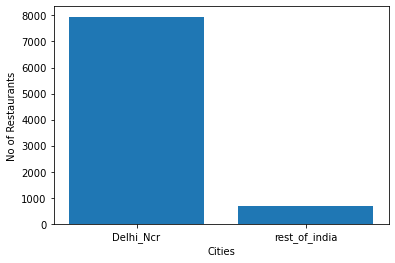

In [3]:
with open(filepath, encoding="latin-1") as fh:
    df = pd.read_csv(fh)
    
    # getting dataset with country : india 
    df = df[df['Country Code'] == 1]

    # replacing all the cities in delhi ncr wit name 'Delhi_Ncr'
    df["City"]=df["City"].apply(lambda x:x.replace("New Delhi","Delhi_Ncr").replace("Ghaziabad","Delhi_Ncr").replace("Noida","Delhi_Ncr").replace("Gurgaon","Delhi_Ncr").replace("Faridabad","Delhi_Ncr"))

    
    ncr_restaurants = df[df['City'] == 'Delhi_Ncr'].City.value_counts().sum()#count of restaurants in delhi ncr
    other_restaurants = df[df['City'] != 'Delhi_Ncr'].City.value_counts().sum()#count of restaurants in rest of india
    
    print("No of restaurants in delhi ncr:", ncr_restaurants)
    print("No of restaurants in rest of india:", other_restaurants)
    
    #list of number of restaurants
    num_restaurants = []
    num_restaurants.append(ncr_restaurants)
    num_restaurants.append(other_restaurants)
    
    #list of the cities of restaurants 
    name = []
    name.append('Delhi_Ncr')
    name.append('rest_of_india')
    
    #plotting bar grapg between num of restaurants in delhi ncr and rest of india     
    plt.bar(name, num_restaurants)
    plt.xlabel('Cities')
    plt.ylabel('No of Restaurants')
    plt.show()
    
    

Justification : In this question I have calculated the number of restaurants in delhi ncr and rest of india by first replacing all the cities in delhi ncr with 'delhi-ncr' and then i have calculated their sum using value_counts().sum(), printed the data and plotted a bar graph.

Q1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [87]:
with open(filepath, encoding="latin-1") as fh:
    df = pd.read_csv(fh)
    
    # getting dataset with country : india 
    df = df[df['Country Code'] == 1]
    
    # replacing all the cities in delhi ncr wit name 'Delhi_Ncr'
    df["City"]=df["City"].apply(lambda x:x.replace("New Delhi","Delhi_Ncr").replace("Ghaziabad","Delhi_Ncr").replace("Noida","Delhi_Ncr").replace("Gurgaon","Delhi_Ncr").replace("Faridabad","Delhi_Ncr"))

    delhi_df = df[df['City'] == 'Delhi_Ncr']#dataframe of delhi ncr
    nondelhi_df = df[df['City'] != 'Delhi_Ncr']#datframe of rest of india
    
    def Dictionary(array): #Creadting function
        dictionary = {} #Creating Dictionary
        for i in array: #Iterating through the parameter, argument will be Cuisines of delhi and non delhi 
            if("," not in i): #Checking if "," present if not
                if i.strip() in dictionary:  #Check if the name already exists in dictionary
                    dictionary[i.strip()]=dictionary.get(i.strip())+1 #Incriment the value by 1
                else:
                    dictionary[i.strip()]=1    #If name is not already present, add the name as key and value = 1
            else:
                string = i.strip().split(",") #If "," is present in the names split on the basis of ","
                for j in string: #Iterating through splitted data
                    if j.strip() in dictionary: #Stripping means removes additional spaces around the data and checking dict
                        dictionary[j.strip()]=dictionary.get(j.strip())+1 #Incriment value if name already exists
                    else: 
                        dictionary[j.strip()]=1 #If name is not already present, add the name as key and value = 1
        return dictionary #return dictionary
    
    delhi_cuisines_dict = Dictionary(delhi_df['Cuisines'])#dictionary of cuisines in delhi ncr
    nondelhi_cuisines_dict = Dictionary(nondelhi_df['Cuisines'])#dictionary of cuisines in rest of india
    
    #printing the cusines present in rest of inida but not in delhi ncr
    for i in nondelhi_cuisines_dict.keys():
        if i not in delhi_cuisines_dict.keys():
            print(i)


German
Malwani
BBQ
Cajun


Justification : To find the number of cuisines which are present in rest of india but not delhi ncr , I have created 2 dictionaries to which I have passed the cuisines of the dataframe of rest of india and delhi ncr respectively. This dictionary will return the cuisines and their count present in rest of Inida and delhi-ncr.After this, I have printed the cuisines which are not present in delhi ncr to get the desired result.

Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [95]:
header = {'User-agent' : 'vanib', 'Accept' : 'apllication/json', 'user-key' : '7c9fc0d09fd8eafbf385157c9de82863'}
url = "https://developers.zomato.com/api/v2.1/cuisines?city_id=1"

res = requests.get(url, headers=header)#making a get request
res = res.json()

check = True

for i in res['cuisines']:
    if i['cuisine']['cuisine_name'] in nondelhi_cuisines_dict.keys():#check if the cusines in delhi ncr are present in l
        check = False#mark check as false
        break
        
#printing the final result        
if check:
    print("True : the cuisines found in previous question are not served in delhi ncr")
else:
    print("False : the cuisines found in previous question are also served in delhi ncr")

False : the cuisines found in previous question are also served in delhi ncr


Justification : Here I have checked whether the data found in Previous question was correct or not with the help of api's and it turns out that the previous data was incorrect due to incomplete dataset.

Q1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [96]:
#######top 10 cuisines in delhi ncr######################
sorted_delhi_dict=sorted(delhi_cuisines_dict.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
    print(sorted_delhi_dict[i][0], sorted_delhi_dict[i][1])

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


Justification : To find top 10 cuisines in delhi ncr i have sorted the dictionary of delhi ncr dataset on the basis of value and then printed the first 10 cuisines.

In [97]:
#######top 10 cuisines in rest of india######################
sorted_nondelhi_dict=sorted(nondelhi_cuisines_dict.items(), key=lambda x: x[1], reverse=True)
for i in range(10):
    print(sorted_nondelhi_dict[i][0], sorted_nondelhi_dict[i][1])

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


Justification : To find top 10 cuisines in rest of india i have sorted the dictionary of non delhi dataset on the basis of value and then printed the first 10 cuisines.

Q1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [100]:
delhi_cuisines_list = []
delhi_cuisines_list_name = []
for i in range(0, 10) :
    delhi_cuisines_list.append(sorted_delhi_dict[i][1])
    delhi_cuisines_list_name.append(sorted_delhi_dict[i][0])

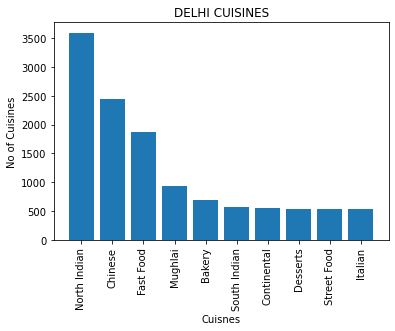

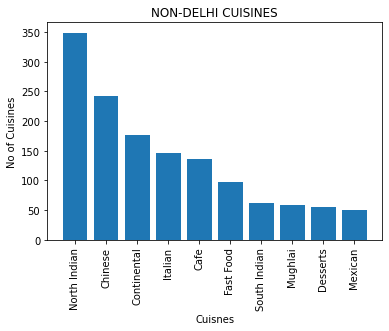

In [104]:
nondelhi_cuisines_list = []
nondelhi_cuisines_list_name = []
for i in range(0, 10) :
    nondelhi_cuisines_list.append(sorted_nondelhi_dict[i][1])
    nondelhi_cuisines_list_name.append(sorted_nondelhi_dict[i][0])


plt.bar(delhi_cuisines_list_name, delhi_cuisines_list)
plt.title("DELHI CUISINES")
plt.xlabel('Cuisnes')
plt.ylabel('No of Cuisines')
plt.xticks(rotation=90)
plt.show()

plt.title("NON-DELHI CUISINES")
plt.bar(nondelhi_cuisines_list_name, nondelhi_cuisines_list)
plt.xlabel('Cuisnes')
plt.ylabel('No of Cuisines')
plt.xticks(rotation=90)
plt.show()

From the graph we can observe that the most served cuisine in delhi ncr and rest of india is north indian and chinese. Apart from this we can also see that italian and continental cuisine has more demand in rest of india which is not the case in delhi-ncr. 

Q2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

Q2.1.1 Number of Votes given Restaurant

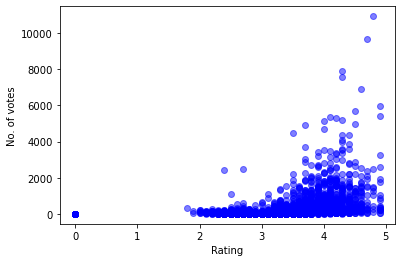

In [12]:
plt.scatter(df['Aggregate rating'], df['Votes'], c= 'b', alpha = 0.5)
plt.xlabel('Rating')
plt.ylabel('No. of votes')
plt.show()

From the graph we can interpret that the rating is more for the restuarnats having more number of votes.

Q2.1.2 Restaurant serving more number of cuisines.

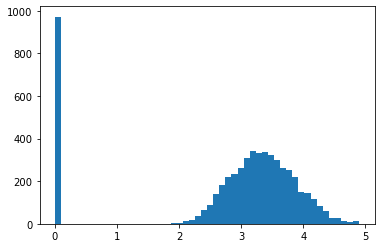

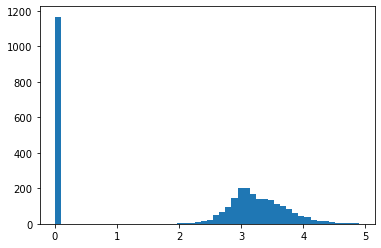

In [13]:
df['Cusine_number'] = df['Cuisines'].str.find(',')

multiple_cuisines_df = df[df['Cusine_number'] != -1]#dataframe of restuarnats serving more number of cuisines
single_cuisine_df = df[df['Cusine_number'] == -1]#dataframe of restuarnats serving only one cuisine
plt.hist(multiple_cuisines_df['Aggregate rating'], bins = 50)
plt.show()

plt.hist(single_cuisine_df['Aggregate rating'], bins = 50)
plt.show()

The intrepretation of the above 2 graphs shows that restaurants serving more number of cuisines have less number of 0 star rating and more number of 3 to 5 star rating whereas restaurants serving only one cuisine have less and poor ratings.

Q2.1.3 Average Cost of Restaurant

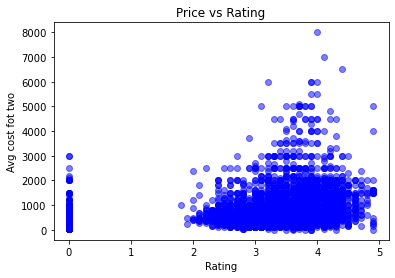

In [14]:
plt.scatter(df['Aggregate rating'],df['Average Cost for two'],c='b',alpha=0.5)
plt.title('Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Avg cost fot two')
plt.show()

From the graph it can be observed that the number of ratings are more in number for the restaurants having lesser average cost .This means more people visit the restaurants which have lesser average cost .The ratings for restaurants having more average cost are less in number.

Q2.1.4 Restaurant serving some specific cuisines.

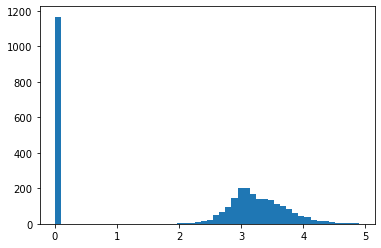

In [49]:
df['Cusine_number'] = df['Cuisines'].str.find(',')

single_cuisine_df = df[df['Cusine_number'] == -1]#dataframe of restuarnats serving only one cuisine

plt.hist(single_cuisine_df['Aggregate rating'], bins = 50)
plt.show()

From the graph we can infer that the restaurants serving some specific cuisines have less umber of ratings than the restaurants serving more than one cuisine

Q2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

Q2.2.1 Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [85]:
df['Aggregate rating'].fillna(0,inplace=True)
df['Votes'].fillna(0,inplace=True)
weight = {}
for i in df["Locality"].unique():
    loc = df[df["Locality"] == i]
    locality = loc["Locality"].values[0]
    votes_sum = loc["Votes"].sum()
    if votes_sum == 0:
        votes_sum = 1
    
    weight[locality] = (loc["Votes"] * loc["Aggregate rating"]).sum() / votes_sum

srt = {k: v for k, v in sorted(weight.items(), key=lambda item: item[1], reverse = True)}
a = list(srt.keys())
b = list(srt.values())
count = 0
while(count < 10):
    print(a[count], b[count])
    count += 1

Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7


From the above output we get top 10 localities having more weighted restaurant rating.

Q3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 29
Giani 29
Baskin Robbins 28
Barbeque Nation 25
Barista 22
Dunkin' Donuts 22
Giani's 22
Costa Coffee 20
Pind Balluchi 20


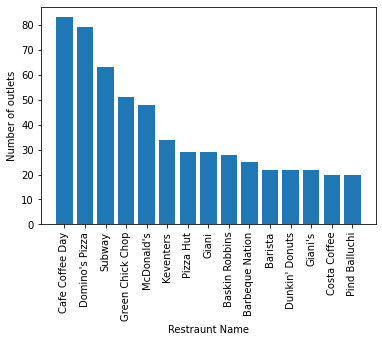

In [16]:
restaurants = df["Restaurant Name"].value_counts()# number of outlets fro eah restaurant

rest_name= list(restaurants.index)#list of restaurant names
outlets = list(restaurants.values)#list of number of outlets

count = 0
while(count < 15):
    print(rest_name[count], outlets[count])
    count += 1

plt.bar(rest_name[0:15], outlets[0:15])
plt.xticks(rotation=90)
plt.xlabel("Restraunt Name")
plt.ylabel("Number of outlets")
plt.show()

In this question i have calculated the number of outlets for each restuarant using value_counts() and then plotted a bar graph to show the number of outlets for each restaurant.

Q3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

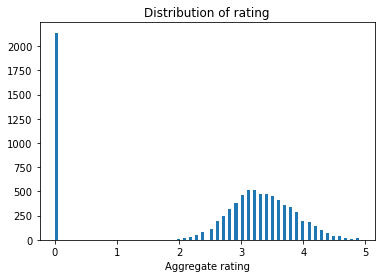

In [17]:
plt.hist(df['Aggregate rating'],bins=100)
plt.xlabel("Aggregate rating")
plt.title("Distribution of rating")
plt.show()

The above graph shows the number of each rating.

Q3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Toit 10934
Truffles 9667
Hauz Khas Social 7931
Peter Cat 7574
AB's - Absolute Barbecues 6907
Barbeque Nation 5966
Big Brewsky 5705
AB's - Absolute Barbecues 5434
The Black Pearl 5385
BarBQ 5288


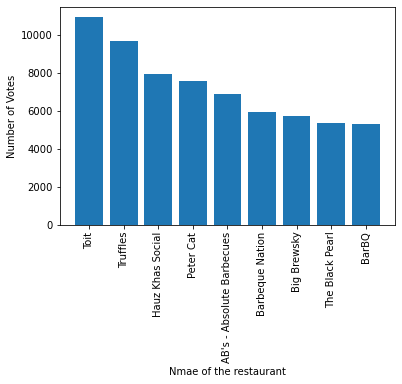

In [19]:
voteData = df.sort_values("Votes", ascending = False)
rName = []
for i in range(10):
    rName.append(voteData["Restaurant Name"].iloc[i])
rVotes = []
for i in range(10):
    rVotes.append(voteData["Votes"].iloc[i])
    
for i in range(len(rName)):
    print(rName[i], rVotes[i])


plt.bar(rName, rVotes)
plt.xticks(rotation=90)
plt.ylabel("Number of Votes")
plt.xlabel("Nmae of the restaurant")
plt.show()

The above graph shows the top 10 highest voted restaurants in India.

Q3.4  Plot the pie graph of top 10 cuisines present in restaurants in the USA.

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


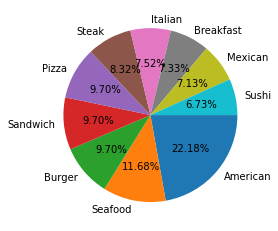

In [22]:
with open(filepath, encoding="latin-1") as fh:
    df = pd.read_csv(fh)
    
    datausa=df[df['Country Code'] == 216]#dataset for usa
    datausa.Cuisines.fillna('Not Known',inplace=True)#filling nan values
    
    def Dictionary(array):
        dictionary={}
        for i in array:
            if ',' not in i:
                if i.strip() in dictionary:
                    dictionary[i.strip()]=dictionary.get(i.strip())+1
                else:
                    dictionary[i.strip()]=1   
            else:
                string=i.strip().split(',')
                for j in string:
                    if j.strip() in dictionary:
                        dictionary[j.strip()]=dictionary.get(j.strip())+1
                    else:
                        dictionary[j.strip()]=1
        return dictionary 
    
    Topcuisine=Dictionary(datausa['Cuisines'])#dictionary of cuisines and their count
    sorted_Topcuisine=sorted(Topcuisine.items(), key=lambda x: x[1], reverse=True)#sorting the dictionary on the basis of values
    
    cuisine_name=[]#list of cuisine names
    for i in range(0,10):
        cuisine_name.append(sorted_Topcuisine[i][0])
        
    cuisine_count=[]#list of cuisne count
    for i in range(0,10):
        cuisine_count.append(sorted_Topcuisine[i][1])
        
    for i in range(0,10):
        print(sorted_Topcuisine[i][0],sorted_Topcuisine[i][1])
        
    plt.pie(cuisine_count, labels = cuisine_name, autopct='%.2f%%', counterclock=False)
    plt.show()

To calculate the top 10 cusines in USA I have made a dictionary to which i have passed the array of Cusines of the dataset datausa .This dictionary will return the cusines with their respective count .Then I have sorted this dictionary and plotted the top 10 cuisnes using pie chart.

Q3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

Agra 20 4.006983511154219
Ahmedabad 21 4.163215392140877
Allahabad 20 3.4096264367816085
Amritsar 21 3.7645839017735336
Aurangabad 20 3.427314814814815
Bangalore 20 4.497423148890671
Bhopal 20 4.125929787973584
Bhubaneshwar 21 3.9677586613245337
Chandigarh 18 4.106690515324374
Chennai 20 4.319682253114281
Coimbatore 20 4.174994074425219
Dehradun 20 4.016172839506172
Faridabad 251 3.4829787234042553
Ghaziabad 25 3.037869822485207
Goa 20 4.158438203735594
Gurgaon 1118 3.7439580811138016
Guwahati 21 4.265733279613215
Hyderabad 18 4.487772943857468
Indore 20 3.998346242411555
Jaipur 20 4.281507965242579
Kanpur 20 3.853793466807165
Kochi 20 4.137380191693291
Kolkata 20 4.295151705424619
Lucknow 21 4.3235268346111715
Ludhiana 20 4.083607130373995
Mangalore 20 3.761117471948706
Mohali 1 4.3
Mumbai 20 4.2166077381553695
Mysore 20 3.76120244246125
Nagpur 20 4.10865162037037
Nashik 20 3.5872553699284
New Delhi 5473 3.765871502689627
Noida 1080 3.472630905726105
Panchkula 1 4.2
Patna 20 3.4550657

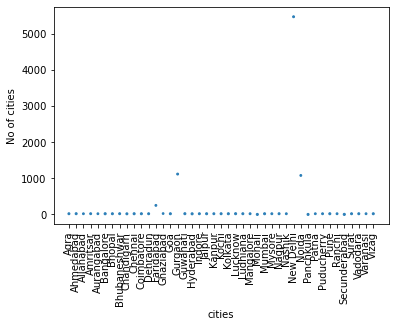

In [43]:
with open(filepath, encoding="latin-1") as fh:
    df = pd.read_csv(fh)

    # getting dataset with country : india 
    df = df[df['Country Code'] == 1]

    weight = {}
    no_of_rest = []#list of total number of rest
    
    for i in df["City"].unique():#iterating over unique city names
        city = df[df["City"] == i]
        cities = city["City"].values[0]
        no_of_rest.append((city.City.value_counts().values)[0])
        weight[cities] = (city["Votes"] * city["Aggregate rating"]).sum() / city["Votes"].sum()

    rest_name = list(weight.keys())#list of rest name
    rating = list(weight.values())#list of weighted rsestaurant rating

    for i in range(len(a)):
        print(rest_name[i], no_of_rest[i], rating[i])

    plt.scatter(rest_name, no_of_rest, s = rating ,alpha = 0.9)
    plt.xlabel('cities')
    plt.ylabel('No of cities')
    plt.xticks(rotation=90)
    plt.show()

From the graph we can observe that there are more restaurants in delhi ncr than rest of india .